## Single Perceptron Training Rule

In [1]:
import numpy as np

In [2]:
# OR gate
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
y = np.array([0, 0, 0, 1])

In [3]:
class Perceptron:
    '''A simple Perceptron implementation for binary classification.
    '''
    def __init__(self, input_size: int, output_size: int, lr: float=0.1, n_iter: int=1000, random_state: int=42) -> None:
        '''Initialize the Perceptron with input size, output size, learning rate, and number of iterations.
        
        Args:
            input_size (int): Number of input features.
            output_size (int): Number of output classes.
            lr (float): Learning rate for weight updates.
            n_iter (int): Number of iterations for training.
        '''
        np.random.seed(random_state)
        self.lr = lr
        self.n_iter = n_iter
        self.weights = np.random.rand(input_size, output_size)
        self.bias = np.zeros((1, output_size))

    def activation(self, z: np.ndarray) -> np.ndarray:
        ''' Step activation function.

        Args:
            z (np.ndarray): Input to the activation function.

        Returns:
            np.ndarray: Output after applying the activation function.
        '''
        return np.where(z > 0, 1, 0)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        ''' Predict the class labels for the input data.

        Args:
            X (np.ndarray): Input data.

        Returns:
            np.ndarray: Predicted class labels.
        '''
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)
    
    def accuracy(self, X: np.ndarray, y: np.ndarray) -> float:
        ''' Calculate the accuracy of the model.

        Args:
            X (np.ndarray): Input data.
            y (np.ndarray): True class labels.

        Returns:
            float: Accuracy of the model.
        '''
        return np.mean(y.reshape(-1, 1) == self.predict(X))
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        ''' Train the Perceptron model.

        Args:
            X (np.ndarray): Input data.
            y (np.ndarray): True class labels.
        '''
        y = y.reshape(-1, 1)

        for epoch in range(self.n_iter):
            accuracy = self.accuracy(X, y)
            print(f"Accuracy in epoch {epoch}: {accuracy}")
            if accuracy == 1.0:
                break

            for i in range(len(X)):
                y_pred = self.predict(X[i].reshape(1, -1))
                error = y[i].reshape(-1, 1) - y_pred
                
                if error:
                    self.weights += self.lr * error * X[i].reshape(-1, 1)
                    self.bias += self.lr * error
                    break

In [4]:
perceptron = Perceptron(input_size=2, output_size=1, lr=0.1, n_iter=1000, random_state=42)
perceptron.fit(X, y)

predictions = perceptron.predict(X)
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted: {predictions[i]}, Actual: {y[i]}")
    
print("Weights:", perceptron.weights)
print("Bias:", perceptron.bias)

Accuracy in epoch 0: 0.5
Accuracy in epoch 1: 0.5
Accuracy in epoch 2: 0.5
Accuracy in epoch 3: 0.5
Accuracy in epoch 4: 0.75
Accuracy in epoch 5: 1.0
Input: [0 0], Predicted: [0], Actual: 0
Input: [0 1], Predicted: [0], Actual: 0
Input: [1 0], Predicted: [0], Actual: 0
Input: [1 1], Predicted: [1], Actual: 1
Weights: [[0.37454012]
 [0.45071431]]
Bias: [[-0.5]]


In [5]:
class PerceptronBatch(Perceptron):
    '''A simple Perceptron implementation for binary classification with batch updates.
    '''
    def __init__(self, input_size: int, output_size: int, lr: float=0.1, n_iter: int=1000, random_state: int=42) -> None:
        '''Initialize the Perceptron with input size, output size, learning rate, and number of iterations.
        
        Args:
            input_size (int): Number of input features.
            output_size (int): Number of output classes.
            lr (float): Learning rate for weight updates.
            n_iter (int): Number of iterations for training.
        '''
        super().__init__(input_size, output_size, lr, n_iter, random_state)
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        ''' Train the Perceptron model using batch updates.

        Args:
            X (np.ndarray): Input data.
            y (np.ndarray): True class labels.
        '''
        y = y.reshape(-1, 1)

        for epoch in range(self.n_iter):
            accuracy = self.accuracy(X, y)
            print(f"Accuracy in epoch {epoch}: {accuracy}")
            if accuracy == 1.0:
                break
            
            y_pred = self.predict(X)
            errors = y - y_pred
            self.weights += self.lr * np.dot(X.T, errors)
            self.bias += self.lr * np.sum(errors, axis=0, keepdims=True)

In [6]:
perceptron = PerceptronBatch(input_size=2, output_size=1, lr=0.1, n_iter=1000, random_state=42)
perceptron.fit(X, y)

predictions = perceptron.predict(X)
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted: {predictions[i]}, Actual: {y[i]}")
    
print("Weights:", perceptron.weights)
print("Bias:", perceptron.bias)

Accuracy in epoch 0: 0.5
Accuracy in epoch 1: 0.5
Accuracy in epoch 2: 0.75
Accuracy in epoch 3: 0.75
Accuracy in epoch 4: 1.0
Input: [0 0], Predicted: [0], Actual: 0
Input: [0 1], Predicted: [0], Actual: 0
Input: [1 0], Predicted: [0], Actual: 0
Input: [1 1], Predicted: [1], Actual: 1
Weights: [[0.17454012]
 [0.55071431]]
Bias: [[-0.6]]


## MLP (Scratch) using sigmoid

In [7]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [8]:
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
y = y.reshape(-1, 1)
X.shape, y.shape

((300, 2), (300, 1))

In [ ]:
class MLP:
    '''A simple Multi-Layer Perceptron (MLP) implementation for binary classification.
    '''
    def __init__(self, input_size: int, hidden_size: int, output_size: int, lr: float=0.1, n_iter: int=1000, random_state: int=42) -> None:
        '''Initialize the MLP with input size, hidden layer size, output size, learning rate, and number of iterations.
        
        Args:
            input_size (int): Number of input features.
            hidden_size (int): Number of hidden layer neurons.
            output_size (int): Number of output classes.
            lr (float): Learning rate for weight updates.
            n_iter (int): Number of iterations for training.
        '''
        np.random.seed(random_state)
        self.lr = lr
        self.n_iter = n_iter
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        ''' Sigmoid activation function.

        Args:
            z (np.ndarray): Input to the activation function.

        Returns:
            np.ndarray: Output after applying the activation function.
        '''
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z: np.ndarray) -> np.ndarray:
        ''' Derivative of the sigmoid function.

        Args:
            z (np.ndarray): Input to the derivative function.

        Returns:
            np.ndarray: Derivative of the sigmoid function.
        '''
        s = self.sigmoid(z)
        return s * (1 - s)
    
    def forward(self, X: np.ndarray) -> np.ndarray:
        ''' Forward pass through the network.

        Args:
            X (np.ndarray): Input data.

        Returns:
            np.ndarray: Output of the network.
        '''
        self.z1 = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights_hidden_output) + self.bias_output
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def backward(self, X: np.ndarray, y: np.ndarray) -> None:
        ''' Backward pass through the network.

        Args:
            X (np.ndarray): Input data.
            y (np.ndarray): True class labels.
        '''
        output_error = y - self.a2
        output_delta = output_error * self.sigmoid_derivative(self.z2)
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.z1)

        self.weights_input_hidden += self.lr * np.dot(X.T, hidden_delta)
        self.weights_hidden_output += self.lr * np.dot(self.a1.T, output_delta)
        self.bias_hidden += self.lr * np.sum(hidden_delta, axis=0, keepdims=True)
        self.bias_output += self.lr * np.sum(output_delta, axis=0, keepdims=True)

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        ''' Train the MLP model.

        Args:
            X (np.ndarray): Input data.
            y (np.ndarray): True class labels.
        '''
        y = y.reshape(-1, 1)

        losses = []
        accuracies = []
        for _ in range(self.n_iter):
            output = self.forward(X)
            self.backward(X, y)

            loss = np.mean((y - output) ** 2)
            losses.append(loss)
            
            predictions = (output > 0.5).astype(int)
            accuracy = np.mean(predictions == y)
            accuracies.append(accuracy)

        return losses, accuracies

In [10]:
mlp = MLP(input_size=2, hidden_size=5, output_size=1, lr=0.1, n_iter=1000, random_state=42)
losses, accuracies = mlp.fit(X, y)

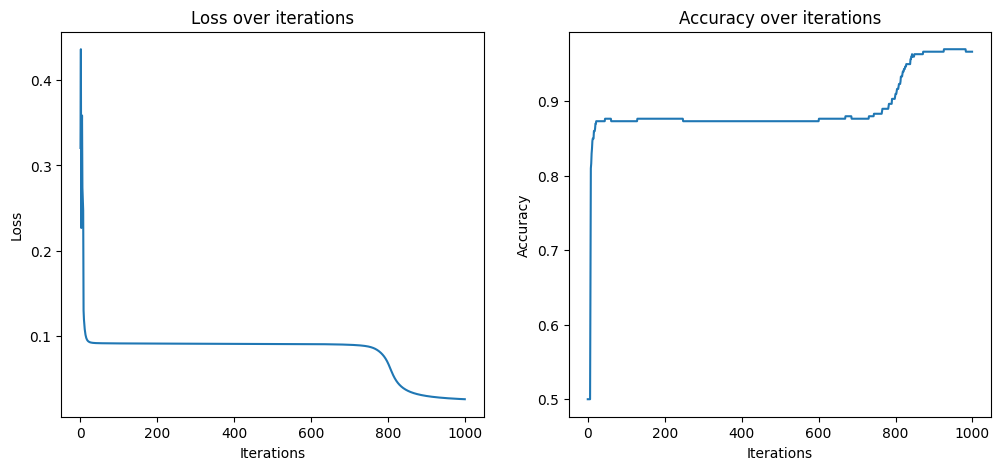

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(losses)
ax[0].set_title('Loss over iterations')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')
ax[1].plot(accuracies)
ax[1].set_title('Accuracy over iterations')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')
plt.show()

In [12]:
print(f'Final Accuracy: {accuracies[-1]}')

Final Accuracy: 0.9666666666666667


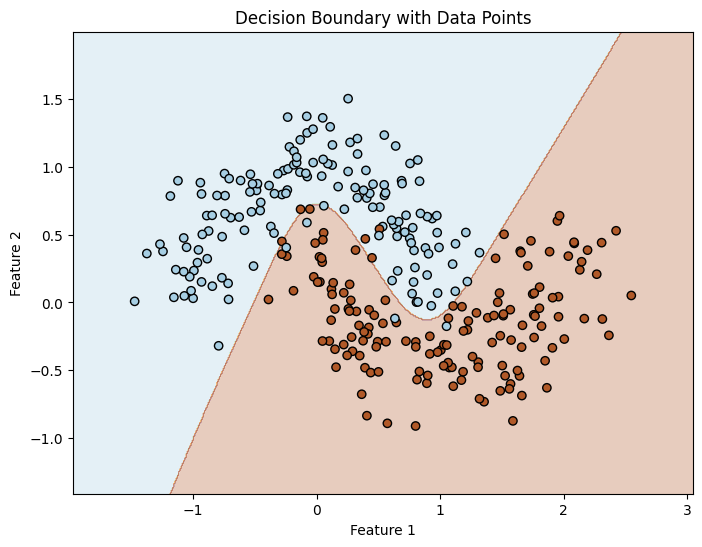

In [13]:
h = 0.01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = mlp.forward(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
plt.title("Decision Boundary with Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## MLP using sklearn

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

In [15]:
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
X.shape, y.shape

((300, 2), (300,))

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
mlp.fit(X, y)

MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)

In [17]:
preds = mlp.predict(X)
accuracy = accuracy_score(y, preds)
print(f'Accuracy: {accuracy}')

Accuracy: 0.86
